In [1]:
# Import libreries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions2 import *

In [2]:
%load_ext autoreload
%autoreload 2

# obtención de la data

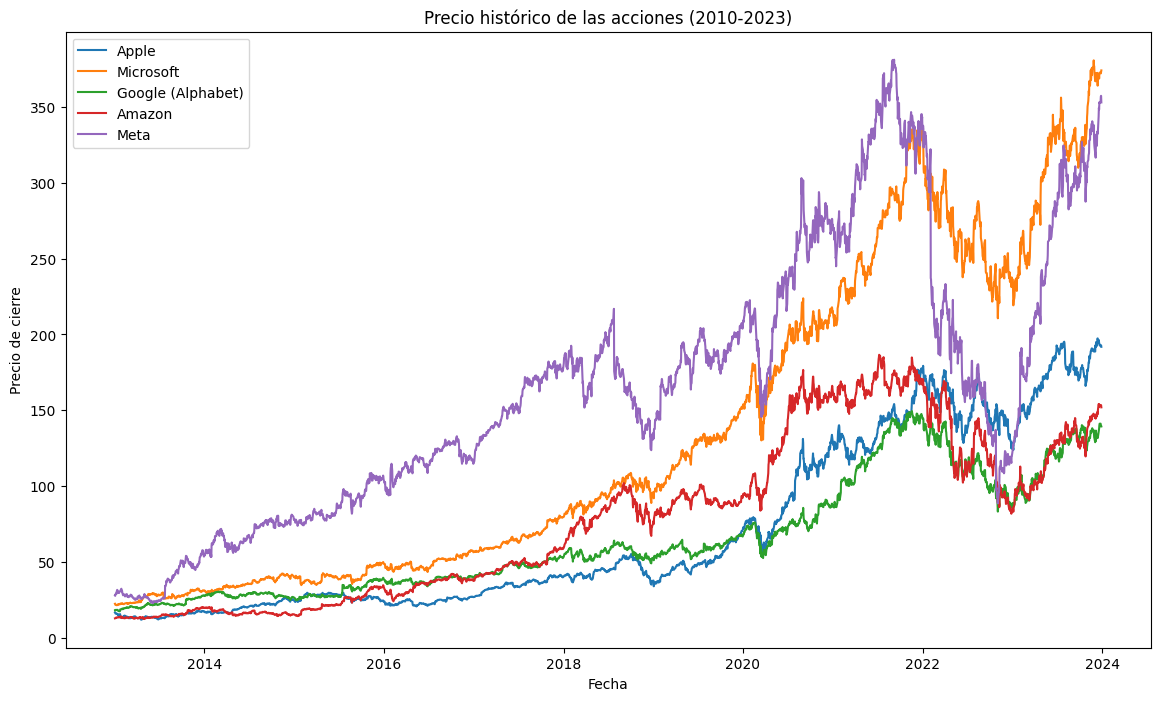

In [3]:
# analysis.ipynb
# Importamos las librerías necesarias


# Lista de empresas a analizar
companies = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Google (Alphabet)': 'GOOGL',
    'Amazon': 'AMZN',
    'Meta': 'META'
}

# Fecha de inicio y fin para los datos históricos
start_date = "2013-01-01"
end_date = "2023-12-31"

# Obtener los datos históricos de cada empresa y almacenarlos en un diccionario
stock_data = {}
for company, ticker in companies.items():
    stock_data[company] = get_stock_data(ticker, start_date, end_date)

# Mostrar los primeros 5 registros de los datos de Apple como ejemplo
stock_data['Apple'].head()

# Obtener los datos financieros de cada empresa (EPS, PER)
financials = {}
for company, ticker in companies.items():
    financials[company] = get_financials(ticker)

# Mostrar los datos financieros
financials

# Visualización de los precios históricos de las acciones de las 5 empresas
plt.figure(figsize=(14,8))

for company in companies:
    plt.plot(stock_data[company].index, stock_data[company]['Close'], label=company)

plt.title('Precio histórico de las acciones (2010-2023)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()


# Cleaned data

Verificar datos faltantes y atípicos

In [4]:
# Verificar datos faltantes en los precios históricos de las acciones
for company, data in stock_data.items():
    missing_values = data.isnull().sum()
    print(f"{company} - Valores faltantes:\n{missing_values}\n")

# Reemplazar los métodos 'fillna(method=...)' por las nuevas formas recomendadas
for company in stock_data:
    stock_data[company] = stock_data[company].ffill()  # Rellenar hacia adelante
    stock_data[company] = stock_data[company].bfill()  # Rellenar hacia atrás, si es necesario


# Verificar valores atípicos en los precios de cierre
import numpy as np

for company, data in stock_data.items():
    # Detectar outliers usando una medida estadística (por ejemplo, IQR o desviación estándar)
    Q1 = data['Close'].quantile(0.25)
    Q3 = data['Close'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR))]
    
    print(f"{company} - Valores atípicos en los precios de cierre:\n{outliers}\n")

# Podemos decidir si eliminamos esos valores atípicos o los mantenemos según el análisis


Apple - Valores faltantes:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Microsoft - Valores faltantes:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Google (Alphabet) - Valores faltantes:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Amazon - Valores faltantes:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Meta - Valores faltantes:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Apple - Valores atípicos en los precios de cierre:
Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

Micr

Verificar la consistencia temporal

In [5]:
# Verificar si los intervalos de tiempo son consistentes entre las empresas
for company, data in stock_data.items():
    print(f"{company} - Rango de fechas: {data.index.min()} a {data.index.max()}")

# Alinear todas las empresas al mismo rango de fechas si es necesario
# Esto es importante para que todas las empresas estén sincronizadas en el análisis comparativo
aligned_data = pd.concat([stock_data[company]['Close'] for company in stock_data], axis=1, keys=stock_data.keys())
aligned_data.dropna(inplace=True)  # Eliminar fechas donde falten datos para alguna empresa

# Verificamos nuevamente
aligned_data.head()


Apple - Rango de fechas: 2013-01-02 00:00:00-05:00 a 2023-12-29 00:00:00-05:00
Microsoft - Rango de fechas: 2013-01-02 00:00:00-05:00 a 2023-12-29 00:00:00-05:00
Google (Alphabet) - Rango de fechas: 2013-01-02 00:00:00-05:00 a 2023-12-29 00:00:00-05:00
Amazon - Rango de fechas: 2013-01-02 00:00:00-05:00 a 2023-12-29 00:00:00-05:00
Meta - Rango de fechas: 2013-01-02 00:00:00-05:00 a 2023-12-29 00:00:00-05:00


,Apple,Microsoft,Google (Alphabet),Amazon,Meta
Date,,,,,
2013-01-02 00:00:00-05:00,16.705709,22.451813,18.054642,12.8655,27.915949
2013-01-03 00:00:00-05:00,16.494839,22.151045,18.065128,12.9240,27.686640
2013-01-04 00:00:00-05:00,16.035376,21.736481,18.422102,12.9575,28.673666
2013-01-07 00:00:00-05:00,15.941055,21.695831,18.341719,13.4230,29.331686
2013-01-08 00:00:00-05:00,15.983955,21.582029,18.305523,13.3190,28.972765


Cálculo de retornos

In [6]:
# Calcular el retorno diario de las acciones
for company in stock_data:
    stock_data[company]['Daily_Return'] = stock_data[company]['Close'].pct_change()

# Mostrar el retorno diario de Apple como ejemplo
stock_data['Apple'].head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return
Date,,,,,,,,
2013-01-02 00:00:00-05:00,16.851459,16.887363,16.480546,16.705709,560518000,0.0,0.0,NaN
2013-01-03 00:00:00-05:00,16.670711,16.725176,16.461368,16.494839,352965200,0.0,0.0,-0.012623
2013-01-04 00:00:00-05:00,16.338739,16.389250,15.999775,16.035376,594333600,0.0,0.0,-0.027855
2013-01-07 00:00:00-05:00,15.883242,16.105364,15.676334,15.941055,484156400,0.0,0.0,-0.005882
2013-01-08 00:00:00-05:00,16.102624,16.184170,15.860420,15.983955,458707200,0.0,0.0,0.002691


## Análisis exploratorio de datos (EDA)

In [7]:
# Visualización: Podemos graficar estos valores intrínsecos junto a los precios históricos de las acciones.

In [8]:
# Cálculo del valor intrínseco utilizando EPS/PER
intrinsic_values = {}

for company, data in financials.items():
    eps = data.get('EPS', None)
    per = data.get('PER', None)
    
    # Verificamos si EPS y PER son válidos
    if eps is not None and per is not None and per != 0:
        intrinsic_value = eps / per
        intrinsic_values[company] = intrinsic_value
    else:
        intrinsic_values[company] = 'No disponible'  # Para casos donde no haya PER o sea 0

# Mostrar el valor intrínseco calculado para cada empresa
intrinsic_values


{'Apple': 0.18423999336736024,
 'Microsoft': 0.3324184448421937,
 'Google (Alphabet)': 0.29812997758002774,
 'Amazon': 0.09333826366783864,
 'Meta': 0.6623269675034391}

In [9]:
# Verificar los valores de EPS y PER obtenidos para cada empresa
for company, data in financials.items():
    eps = data.get('EPS', None)
    per = data.get('PER', None)
    print(f"{company} - EPS: {eps}, PER: {per}")


Apple - EPS: 6.58, PER: 35.714287
Microsoft - EPS: 11.79, PER: 35.467346
Google (Alphabet) - EPS: 6.98, PER: 23.412607
Amazon - EPS: 4.2, PER: 44.997623
Meta - EPS: 19.54, PER: 29.502045


In [10]:
# Comparar EPS y precio de mercado actual
eps_vs_price = {}

for company in stock_data:
    eps = financials[company]['EPS']
    current_price = stock_data[company]['Close'].iloc[-1]
    
    eps_vs_price[company] = {
        'EPS': eps,
        'Precio Actual': current_price,
        'Relación EPS/Precio': eps / current_price
    }

# Mostrar los resultados de EPS vs Precio Actual
eps_vs_price_df = pd.DataFrame(eps_vs_price).T
eps_vs_price_df


,EPS,Precio Actual,Relación EPS/Precio
Apple,6.58,191.802185,0.034306
Microsoft,11.79,373.995972,0.031524
Google (Alphabet),6.98,139.344955,0.050092
Amazon,4.20,151.940002,0.027642
Meta,19.54,352.897491,0.055370


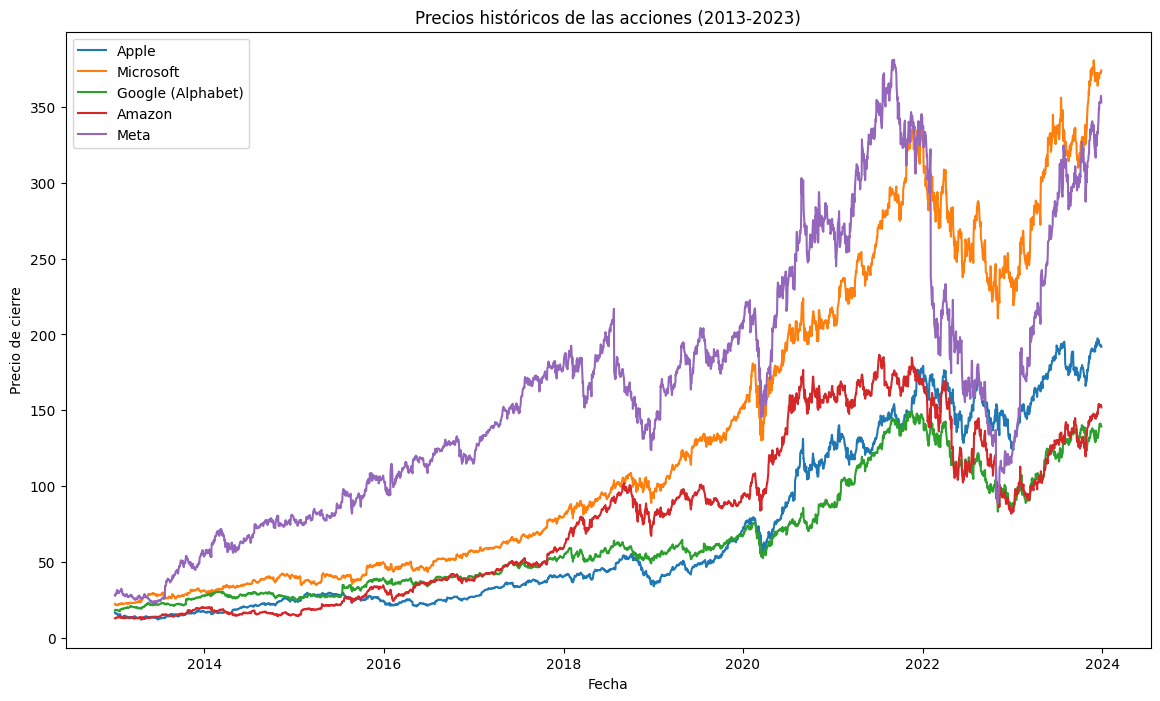

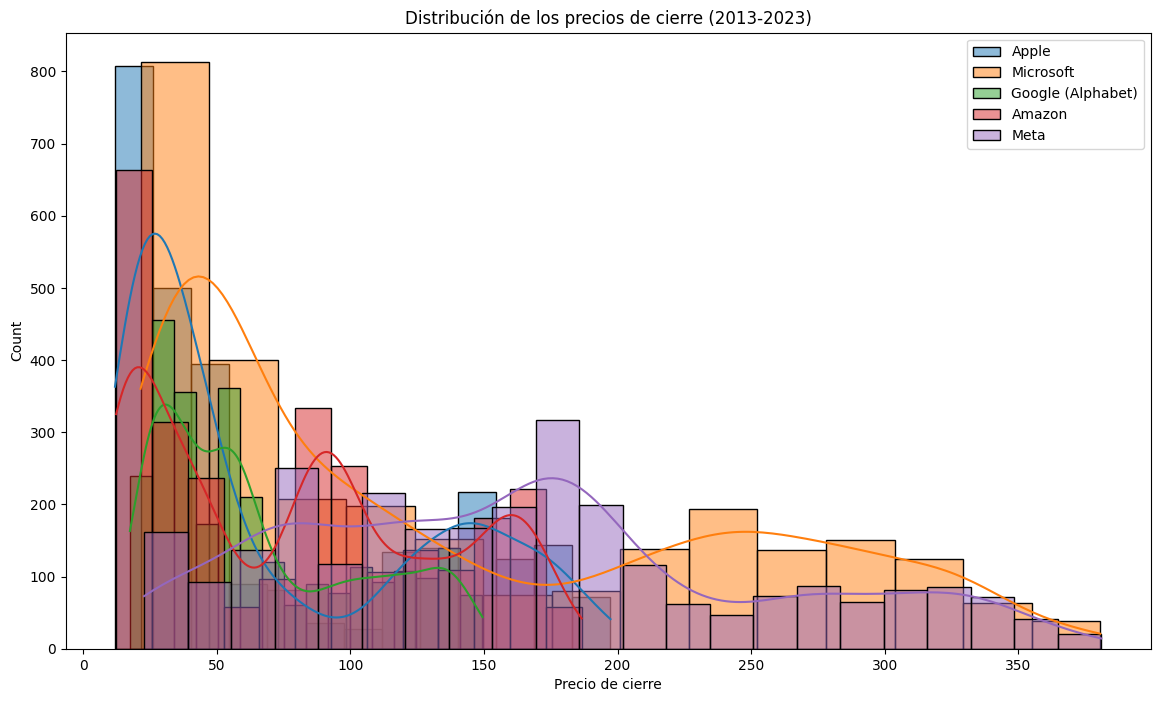

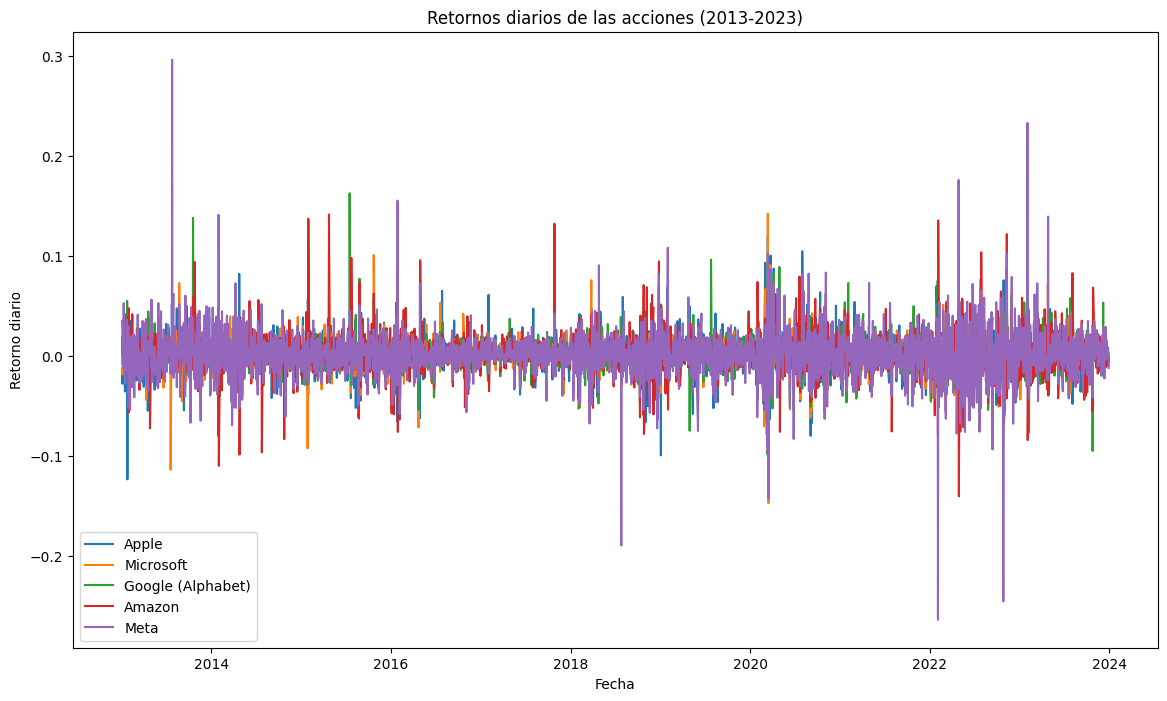

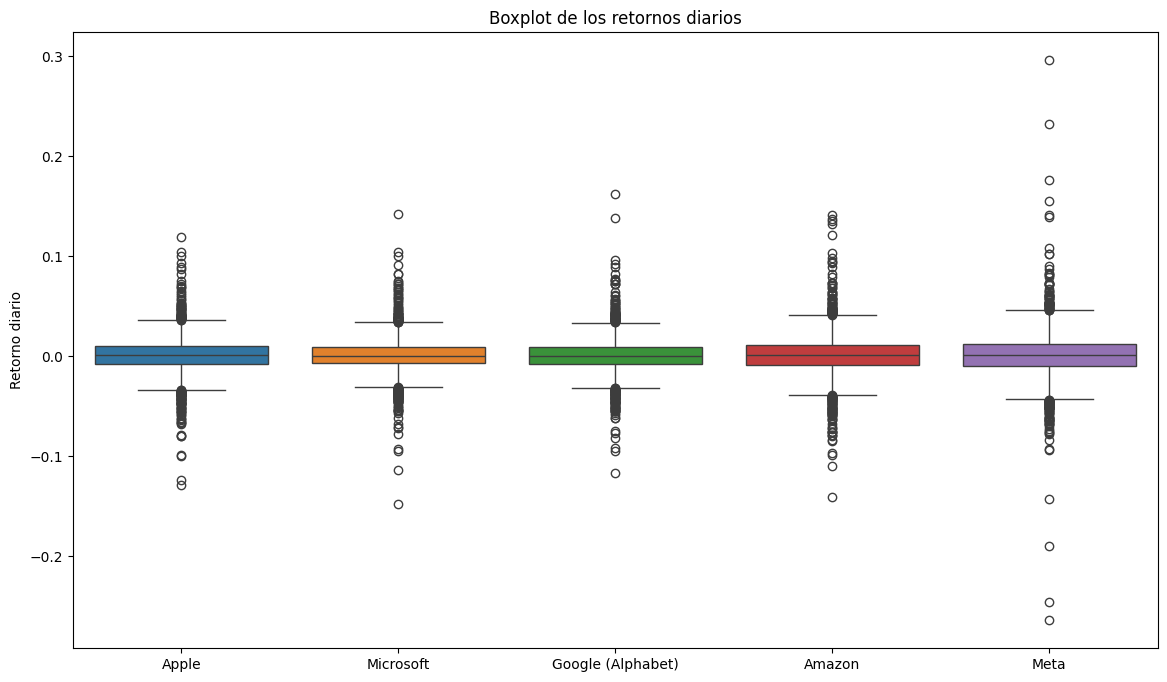

Comparación de EPS y Precio Actual:


,EPS,Precio Actual,Relación EPS/Precio
Apple,6.58,191.802185,0.034306
Microsoft,11.79,373.995972,0.031524
Google (Alphabet),6.98,139.344955,0.050092
Amazon,4.20,151.940002,0.027642
Meta,19.54,352.897491,0.055370


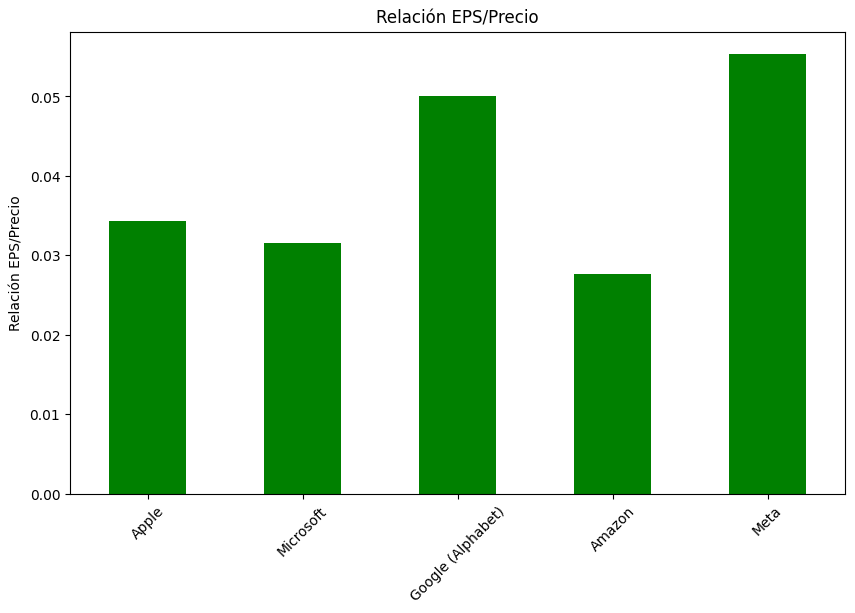


Comparación de Precio Actual vs. Valor Intrínseco:


,Precio Actual,Valor Intrínseco
Apple,191.802185,0.184240
Microsoft,373.995972,0.332418
Google (Alphabet),139.344955,0.298130
Amazon,151.940002,0.093338
Meta,352.897491,0.662327


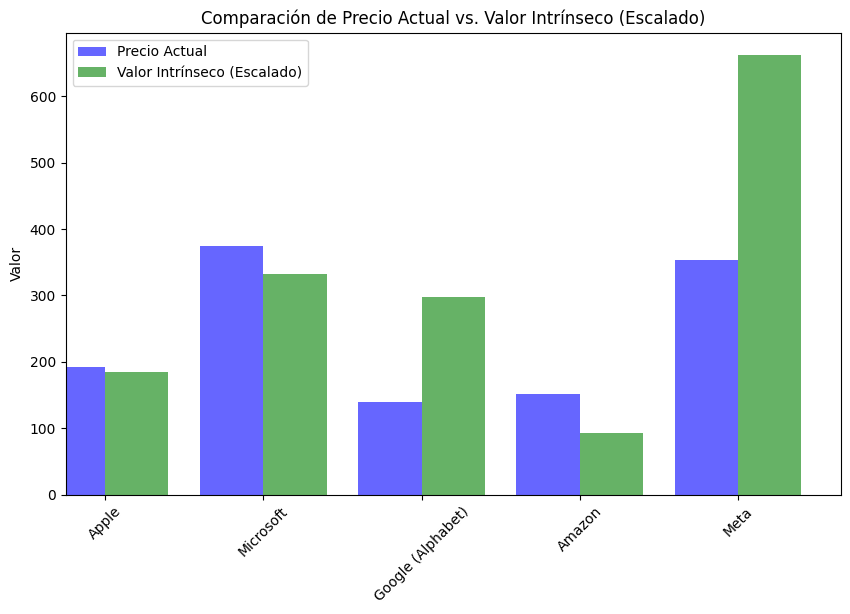

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Visualización de los precios históricos de cierre
plt.figure(figsize=(14,8))
for company in stock_data:
    plt.plot(stock_data[company].index, stock_data[company]['Close'], label=company)
plt.title('Precios históricos de las acciones (2013-2023)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.legend()
plt.show()

# 2. Histograma para la distribución de los precios de cierre
plt.figure(figsize=(14,8))
for company in stock_data:
    sns.histplot(stock_data[company]['Close'], kde=True, label=company)
plt.title('Distribución de los precios de cierre (2013-2023)')
plt.xlabel('Precio de cierre')
plt.legend()
plt.show()

# 3. Cálculo de los retornos diarios
for company in stock_data:
    stock_data[company]['Daily_Return'] = stock_data[company]['Close'].pct_change()

# 4. Visualización de los retornos diarios
plt.figure(figsize=(14,8))
for company in stock_data:
    plt.plot(stock_data[company].index, stock_data[company]['Daily_Return'], label=company)
plt.title('Retornos diarios de las acciones (2013-2023)')
plt.xlabel('Fecha')
plt.ylabel('Retorno diario')
plt.legend()
plt.show()

# 5. Boxplot de retornos para ver la volatilidad
plt.figure(figsize=(14,8))
returns_df = pd.DataFrame({company: stock_data[company]['Daily_Return'] for company in stock_data})
sns.boxplot(data=returns_df)
plt.title('Boxplot de los retornos diarios')
plt.ylabel('Retorno diario')
plt.show()

# 6. Comparar EPS con el precio actual de las acciones
eps_vs_price = {}

for company in stock_data:
    eps = financials[company]['EPS']
    current_price = stock_data[company]['Close'].iloc[-1]
    
    eps_vs_price[company] = {
        'EPS': eps,
        'Precio Actual': current_price,
        'Relación EPS/Precio': eps / current_price
    }

# Crear un DataFrame para visualizar esta relación
eps_vs_price_df = pd.DataFrame(eps_vs_price).T

# Mostrar la relación EPS/Precio en la tabla
print("Comparación de EPS y Precio Actual:")
display(eps_vs_price_df)

# 7. Visualización de la relación EPS/Precio en gráfico de barras
plt.figure(figsize=(10,6))
eps_vs_price_df['Relación EPS/Precio'].plot(kind='bar', color='green')
plt.title('Relación EPS/Precio')
plt.ylabel('Relación EPS/Precio')
plt.xticks(rotation=45)
plt.show()

# 8. Comparativa del valor intrínseco y el precio actual
# Usamos los valores calculados previamente para el valor intrínseco
current_prices = {company: stock_data[company]['Close'].iloc[-1] for company in stock_data}

comparison_df = pd.DataFrame({
    'Precio Actual': current_prices,
    'Valor Intrínseco': intrinsic_values
})

# Mostrar la comparación en tabla
print("\nComparación de Precio Actual vs. Valor Intrínseco:")
display(comparison_df)

# 9. Visualización del valor intrínseco vs. precio actual
# Escalamos el valor intrínseco por 1000 para hacerlo visible en el gráfico
comparison_df['Valor Intrínseco Escalado'] = comparison_df['Valor Intrínseco'] * 1000

# Visualización del valor intrínseco vs. precio actual con escala
plt.figure(figsize=(10,6))
comparison_df['Precio Actual'].plot(kind='bar', color='blue', alpha=0.6, position=1, width=0.4, label='Precio Actual')
comparison_df['Valor Intrínseco Escalado'].plot(kind='bar', color='green', alpha=0.6, position=0, width=0.4, label='Valor Intrínseco (Escalado)')
plt.title('Comparación de Precio Actual vs. Valor Intrínseco (Escalado)')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend()
plt.show()



## Modelos Arima

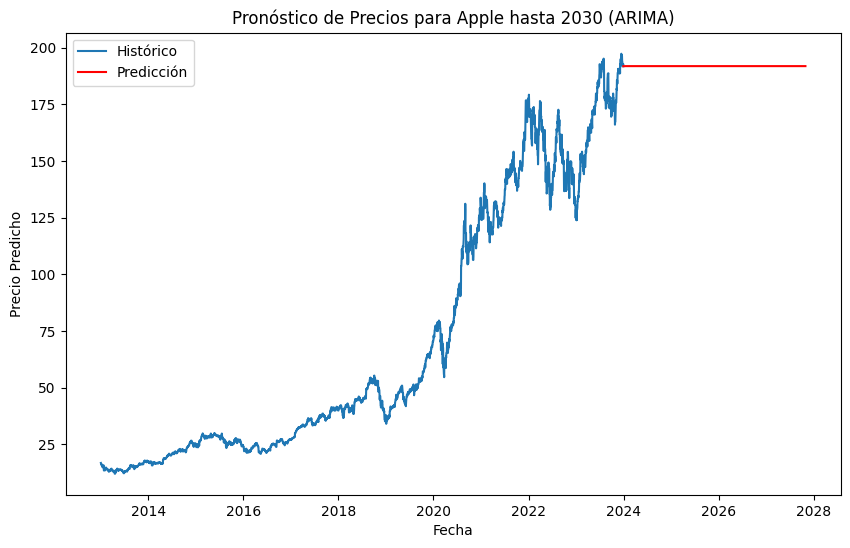

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preparar los datos (ejemplo: Apple)
apple_data = stock_data['Apple'][['Close']]
apple_data = apple_data.asfreq('D')  # Convertimos a frecuencia diaria
apple_data = apple_data.ffill()  # Usamos forward fill para rellenar los valores faltantes

# Entrenar el modelo ARIMA (ejemplo p=5, d=1, q=0)
model = ARIMA(apple_data, order=(5, 1, 0))
model_fit = model.fit()

# Realizar el pronóstico a futuro (por ejemplo, 7 años = 7*365 días)
forecast_steps = 7 * 200
forecast = model_fit.forecast(steps=forecast_steps)

# Crear una serie de fechas para las predicciones (ajustamos para que coincidan las dimensiones)
forecast_dates = pd.date_range(start=apple_data.index[-1], periods=forecast_steps, freq='D')

# Visualizar el pronóstico (asegurando que las dimensiones coincidan)
plt.figure(figsize=(10,6))
plt.plot(apple_data.index, apple_data['Close'], label='Histórico')
plt.plot(forecast_dates[:len(forecast)], forecast, label='Predicción', color='red')  # Aseguramos que coincidan las longitudes
plt.title('Pronóstico de Precios para Apple hasta 2030 (ARIMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho')
plt.legend()
plt.show()


ARIMA(0, 0, 0) - AIC:43802.41757588931
ARIMA(0, 0, 1) - AIC:38355.51718453855
ARIMA(0, 0, 2) - AIC:33631.66701565932
ARIMA(0, 0, 3) - AIC:29972.219963551397
ARIMA(0, 0, 4) - AIC:27255.049193633124
ARIMA(0, 0, 5) - AIC:26790.08224381935
ARIMA(0, 1, 0) - AIC:13795.120922478975
ARIMA(0, 1, 1) - AIC:13788.174650909601
ARIMA(0, 1, 2) - AIC:13789.466984053162
ARIMA(0, 1, 3) - AIC:13791.099827892365
ARIMA(0, 1, 4) - AIC:13792.289913945358
ARIMA(0, 1, 5) - AIC:13792.921133964444


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 0) - AIC:13810.668525574747


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1) - AIC:13803.763460023505


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 2) - AIC:13805.065909456891


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 3) - AIC:13806.692173321091


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 4) - AIC:13807.89191835392


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 5) - AIC:13808.535782785586
ARIMA(1, 1, 0) - AIC:13788.43711597977
ARIMA(1, 1, 1) - AIC:13789.65027631028
ARIMA(1, 1, 2) - AIC:13781.440093402962
ARIMA(1, 1, 3) - AIC:13793.40498805679
ARIMA(1, 1, 4) - AIC:13794.079748350214
ARIMA(1, 1, 5) - AIC:13794.090555854673


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 0) - AIC:13804.022961992383


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 1) - AIC:13808.26604521303


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 2) - AIC:13797.034683616912


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 3) - AIC:13799.034409519878


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 0, 4) - AIC:13801.01915550752
ARIMA(2, 0, 5) - AIC:13802.986800149063
ARIMA(2, 1, 0) - AIC:13789.376003398731
ARIMA(2, 1, 1) - AIC:13781.49252332803


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) - AIC:13777.160432244622
ARIMA(2, 1, 3) - AIC:13771.431731892935


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 4) - AIC:13771.926093503032


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(2, 1, 5) - AIC:13774.528448790308
ARIMA(3, 0, 0) - AIC:13804.974244360696


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 0, 1) - AIC:13797.084593828524


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters foun

ARIMA(3, 0, 2) - AIC:13784.565787547495


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 0, 3) - AIC:13783.973855043085
ARIMA(3, 0, 4) - AIC:13785.552048893638


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 0, 5) - AIC:13787.442514764438
ARIMA(3, 1, 0) - AIC:13790.96002400988
ARIMA(3, 1, 1) - AIC:13792.871304396862


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:13794.891338439867


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC:13772.827296057658


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 4) - AIC:13758.58259421603


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 1, 5) - AIC:13776.591842599943
ARIMA(4, 0, 0) - AIC:13806.549918962926


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 0, 1) - AIC:13799.03802092031


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Us

ARIMA(4, 0, 2) - AIC:13783.876843179032


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 0, 3) - AIC:13796.940719160992


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 0, 4) - AIC:13798.204009381474


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 5) - AIC:13777.606777821971
ARIMA(4, 1, 0) - AIC:13792.434101956238
ARIMA(4, 1, 1) - AIC:13794.133243583234


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 2) - AIC:13786.911544026341


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) - AIC:13773.628570248555


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 4) - AIC:13768.31120084497


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(4, 1, 5) - AIC:13767.486432381711
ARIMA(5, 0, 0) - AIC:13808.032664983062


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters foun

ARIMA(5, 0, 1) - AIC:13801.079638480353
ARIMA(5, 0, 2) - AIC:13785.85395224274


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Us

ARIMA(5, 0, 3) - AIC:13772.818024757507


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(5, 0, 4) - AIC:13774.937707109602


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 5) - AIC:13790.692554288426
ARIMA(5, 1, 0) - AIC:13792.406434912766
ARIMA(5, 1, 1) - AIC:13793.817619122174


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Us

ARIMA(5, 1, 2) - AIC:13774.121824701548
ARIMA(5, 1, 3) - AIC:13776.409193002957
ARIMA(5, 1, 4) - AIC:13785.039729333112


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 5) - AIC:13767.718398110352

Mejor modelo ARIMA(3, 1, 4) - AIC:13758.58259421603


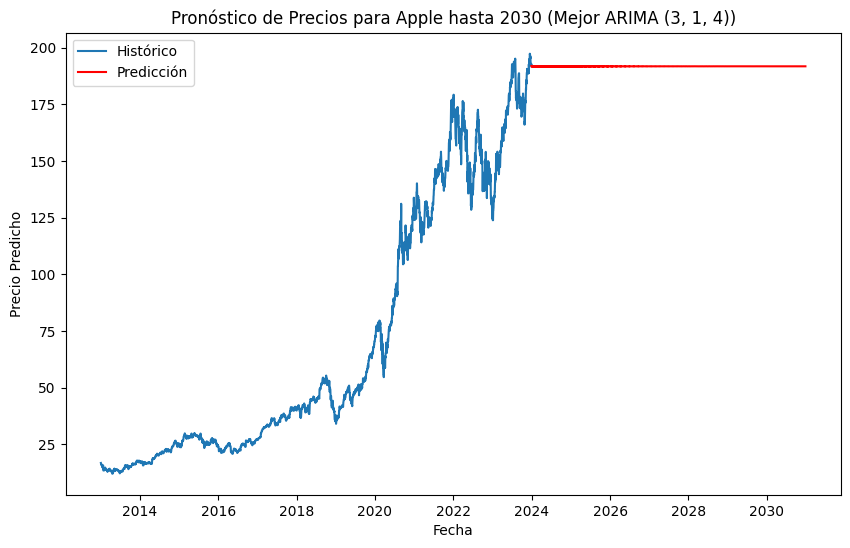

In [18]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Preparar los datos (ejemplo: Apple)
apple_data = stock_data['Apple'][['Close']]
apple_data = apple_data.asfreq('D')  # Convertimos a frecuencia diaria
apple_data = apple_data.ffill()  # Rellenar valores faltantes

# Definir el rango de valores para p, d, q
p = range(0, 6)
d = range(0, 2)
q = range(0, 6)

# Generar todas las combinaciones posibles de p, d, q
pdq = list(itertools.product(p, d, q))

# Almacenar el mejor modelo
best_aic = float("inf")
best_order = None
best_model = None

# Probar cada combinación de parámetros p, d, q
for param in pdq:
    try:
        model = ARIMA(apple_data, order=param)
        model_fit = model.fit()
        print(f"ARIMA{param} - AIC:{model_fit.aic}")
        
        # Guardar el modelo con el AIC más bajo
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = param
            best_model = model_fit
    except Exception as e:
        continue

# Mostrar el mejor modelo encontrado
print(f"\nMejor modelo ARIMA{best_order} - AIC:{best_aic}")

# Realizar el pronóstico con el mejor modelo encontrado
forecast_steps = 7 * 365  # Pronóstico para 7 años (hasta 2030)
forecast = best_model.forecast(steps=forecast_steps)

# Crear una serie de fechas para las predicciones
forecast_dates = pd.date_range(start=apple_data.index[-1], periods=forecast_steps, freq='D')

# Visualizar el pronóstico
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(apple_data.index, apple_data['Close'], label='Histórico')
plt.plot(forecast_dates[:len(forecast)], forecast, label='Predicción', color='red')
plt.title(f'Pronóstico de Precios para Apple hasta 2030 (Mejor ARIMA {best_order})')
plt.xlabel('Fecha')
plt.ylabel('Precio Predicho')
plt.legend()
plt.show()


Epoch 1/20


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0335
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.4519e-04
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.4729e-04
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.4988e-04
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.1878e-04
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.2077e-04
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.1590e-04
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.0504e-04
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.0218e-04
Epoch 10/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.0093e-04
Epoch 11/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.0481e-04
Epoch 12/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 9.7522e-05
Epoch 13/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.0333e-04
Epoch 14/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.0499e-04
Epoch 15/20
85/85 ━━━━━━━━━━━━

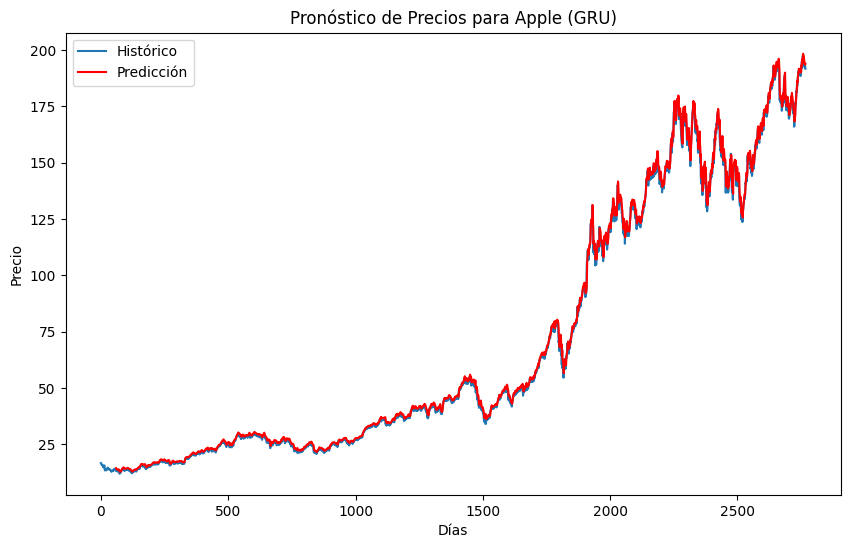

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Preparar los datos (ejemplo: Apple)
apple_data = stock_data['Apple'][['Close']].values

# Escalado de los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
apple_data_scaled = scaler.fit_transform(apple_data)

# Crear secuencias de entrada y salida
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i, 0])
        targets.append(data[i, 0])
    return np.array(sequences), np.array(targets)

sequence_length = 60  # Usaremos 60 días de datos para predecir el siguiente día
X, y = create_sequences(apple_data_scaled, sequence_length)

# Reshape para que sea aceptado por GRU (n_samples, timesteps, n_features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Definir el modelo GRU
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))  # Predecimos un valor (el precio)

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X, y, epochs=20, batch_size=32)

# Predecir precios futuros
predicted_prices_scaled = model.predict(X)

# Desescalar los valores predichos
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

# Visualizar el resultado
plt.figure(figsize=(10,6))
plt.plot(apple_data, label='Histórico')
plt.plot(np.arange(sequence_length, len(predicted_prices) + sequence_length), predicted_prices, color='red', label='Predicción')
plt.title('Pronóstico de Precios para Apple (GRU)')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU


 Preparar los datos:

In [42]:
# Obtener más columnas de datos históricos
apple_data = stock_data['Apple'][['Open', 'High', 'Low', 'Close', 'Volume']].copy()  # Usar .copy() para evitar problemas de vistas

# Asegurarse de que el índice sea de tipo datetime
apple_data.index = pd.to_datetime(apple_data.index)

# Ordenar los datos por fecha
apple_data.sort_index(ascending=True, inplace=True)

# Calcular la media móvil de 10, 30, y 60 días usando .loc para evitar el SettingWithCopyWarning
apple_data.loc[:, 'MA_10'] = apple_data['Close'].rolling(window=10).mean()
apple_data.loc[:, 'MA_30'] = apple_data['Close'].rolling(window=30).mean()
apple_data.loc[:, 'MA_60'] = apple_data['Close'].rolling(window=60).mean()

# Calcular el retorno logarítmico
apple_data.loc[:, 'Log_Return'] = np.log(apple_data['Close'] / apple_data['Close'].shift(1))

# Rellenar valores nulos usando ffill y bfill
apple_data.ffill(inplace=True)  # Rellenar hacia adelante primero
apple_data.bfill(inplace=True)  # Luego rellenar hacia atrás si aún hay nulos

# Visualizar las primeras filas con las nuevas características
print(apple_data.head())



                                Open       High        Low      Close  \
Date                                                                    
2013-01-02 00:00:00-05:00  16.851459  16.887363  16.480546  16.705709   
2013-01-03 00:00:00-05:00  16.670711  16.725176  16.461368  16.494839   
2013-01-04 00:00:00-05:00  16.338739  16.389250  15.999775  16.035376   
2013-01-07 00:00:00-05:00  15.883242  16.105364  15.676334  15.941055   
2013-01-08 00:00:00-05:00  16.102624  16.184170  15.860420  15.983955   

                              Volume      MA_10      MA_30      MA_60  \
Date                                                                    
2013-01-02 00:00:00-05:00  560518000  15.870828  14.845844  14.231014   
2013-01-03 00:00:00-05:00  352965200  15.870828  14.845844  14.231014   
2013-01-04 00:00:00-05:00  594333600  15.870828  14.845844  14.231014   
2013-01-07 00:00:00-05:00  484156400  15.870828  14.845844  14.231014   
2013-01-08 00:00:00-05:00  458707200  15.870828  1

Epoch 1/50


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0329 - val_loss: 0.0012
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0012 - val_loss: 5.4180e-04
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.8890e-04 - val_loss: 5.3625e-04
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.9307e-04 - val_loss: 0.0010
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.5458e-04 - val_loss: 5.6000e-04
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.3014e-04 - val_loss: 8.3275e-04
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 8.0406e-04 - val_loss: 8.2829e-04
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.4249e-04 - val_loss: 6.4967e-04
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.6183e-04 - val_loss: 5.0731e-04
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.2621e-04 - val_loss: 5.0460e-04
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.7157e-04 - val_loss: 5.1253e-04
Ep

C:\Users\danny\AppData\Local\Temp\ipykernel_11772\1115052362.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date, periods=n_future_steps, freq='M')


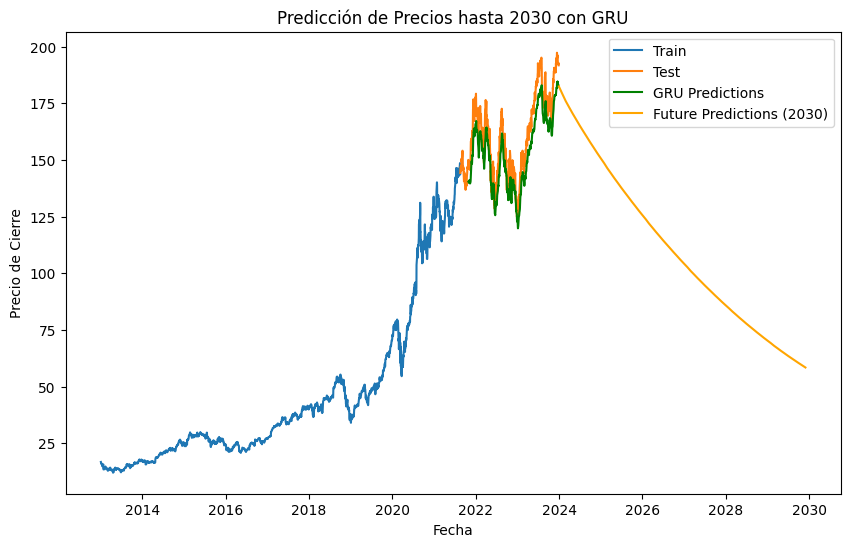

In [57]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_data[['Close']])

# Preparar datos para GRU
def create_dataset(dataset, time_step=50):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Definir el tamaño de la ventana de tiempo
time_step = 50
X, y = create_dataset(scaled_data, time_step)

# Redimensionar los datos para que tengan la forma esperada por GRU
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construcción del modelo GRU con regularización
model_gru = Sequential()

# Primera capa GRU con Dropout
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(Dropout(0.2))

# Segunda capa GRU
model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dropout(0.2))

# Capa densa de salida
model_gru.add(Dense(1))

# Compilación del modelo
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo GRU
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predicciones con el modelo entrenado
pred_gru = model_gru.predict(X_test)

# Invertir el escalado de las predicciones
pred_gru = scaler.inverse_transform(pred_gru.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Asegurarnos de que la longitud de las predicciones y las fechas coincidan
min_len = min(len(pred_gru), len(apple_data.index[train_size + time_step:]))
pred_gru = pred_gru[:min_len]
x_dates = apple_data.index[train_size + time_step:train_size + time_step + min_len]

# Predicción iterativa para hasta 2030
last_window = X_test[-1]  # Última ventana
n_future_steps = (2030 - 2024) * 12  # Predicción mensual hasta 2030

future_predictions = []
for _ in range(n_future_steps):
    next_pred = model_gru.predict(last_window.reshape(1, time_step, 1))
    future_predictions.append(next_pred[0, 0])
    last_window = np.append(last_window[1:], next_pred[0, 0]).reshape(time_step, 1)

# Invertir el escalado de las predicciones futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Crear un índice de fechas para las predicciones futuras
last_date = apple_data.index[-1]
future_dates = pd.date_range(last_date, periods=n_future_steps, freq='M')

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(apple_data.index[:train_size], apple_data['Close'][:train_size], label='Train')
plt.plot(apple_data.index[train_size:], apple_data['Close'][train_size:], label='Test')
plt.plot(x_dates, pred_gru, label='GRU Predictions', color='green')
plt.plot(future_dates, future_predictions, label='Future Predictions (2030)', color='orange')
plt.title('Predicción de Precios hasta 2030 con GRU')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


Epoch 1/50


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 0.0144 - val_loss: 0.0033
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 3.4096e-04 - val_loss: 0.0010
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 1.5343e-04 - val_loss: 0.0012
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 1.4011e-04 - val_loss: 7.8180e-04
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 1.1233e-04 - val_loss: 6.3794e-04
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 9.5858e-05 - val_loss: 5.6921e-04
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 8.7451e-05 - val_loss: 5.0269e-04
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 6.1776e-05 - val_loss: 6.1294e-04
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 6.7055e-05 - val_loss: 3.9136e-04
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 5.3333e-05 - val_loss: 4.6046e-04
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 7.0715e-05 - val_loss: 3.

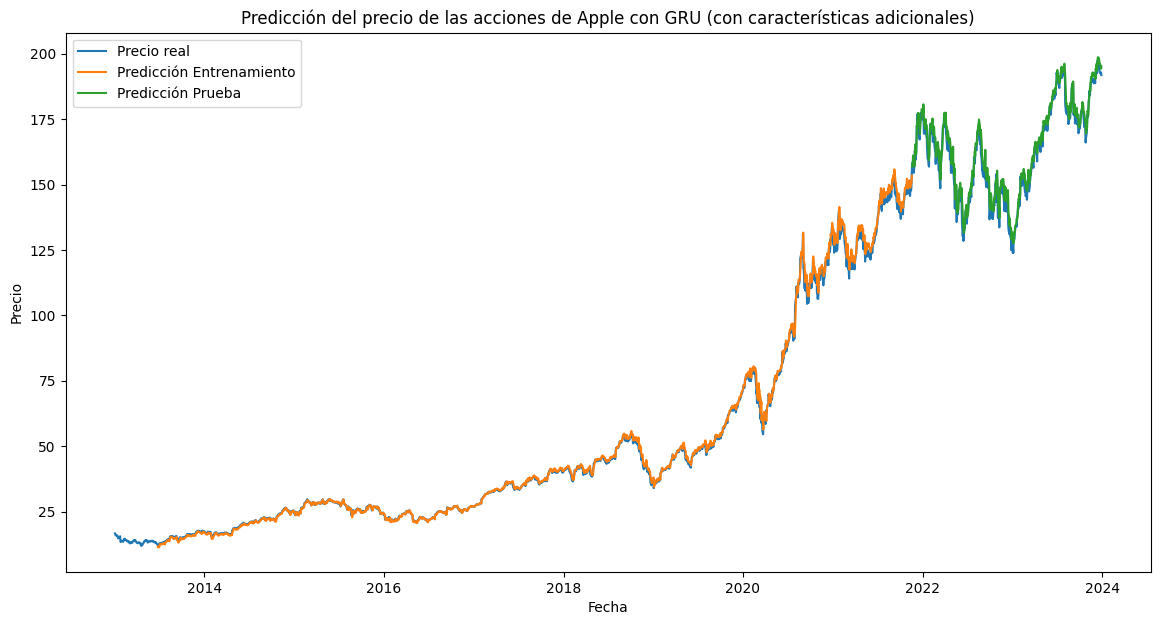

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

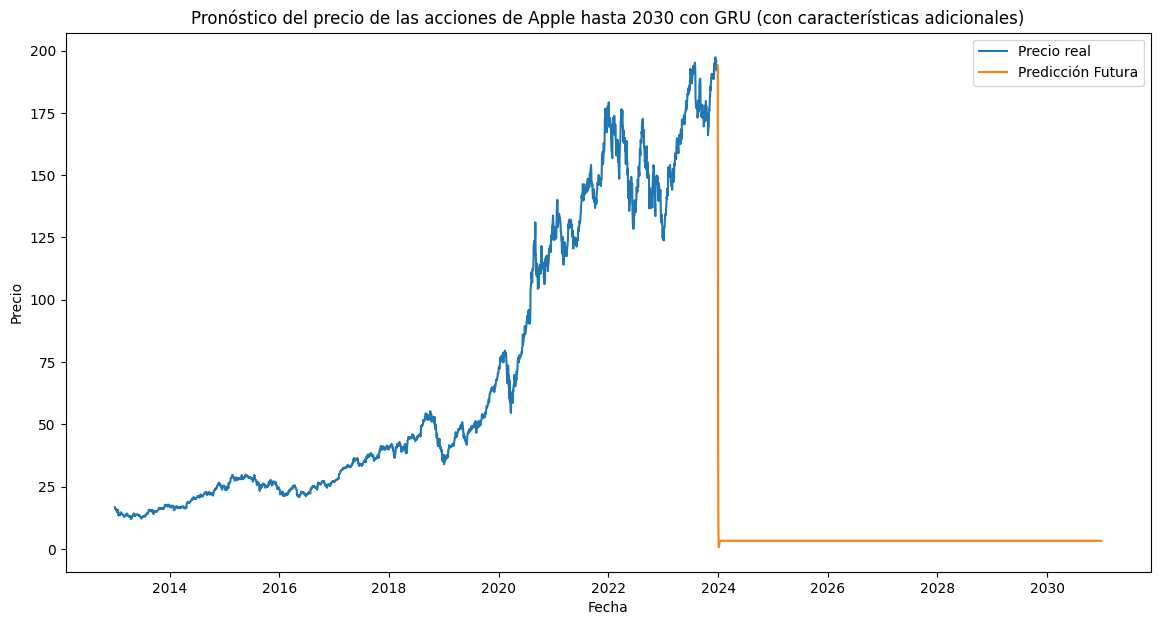

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

# Asegurarse de que los datos estén bien preparados con las características adicionales (asumiendo que ya lo hemos hecho)

# Escalar los datos entre 0 y 1 (todas las columnas)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_data)

# Crear las secuencias y los valores a predecir (usando todas las columnas ahora)
X = []
y = []

# Aumentamos la ventana de tiempo a 120 días
window_size = 120

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i])  # Usamos todas las columnas ahora
    y.append(scaled_data[i, 3])  # Usamos la columna 'Close' (índice 3) como el valor objetivo

# Convertir a arrays numpy
X, y = np.array(X), np.array(y)

# Dividir en entrenamiento (80%) y prueba (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Ajuste de hiperparámetros: Usamos más unidades y capas GRU
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=100))  # Segunda capa GRU
model.add(Dense(1))  # Capa de salida

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Hacer predicciones para los datos de prueba y entrenamiento
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización para obtener valores originales
train_predict = scaler.inverse_transform(np.concatenate([train_predict, np.zeros((train_predict.shape[0], scaled_data.shape[1]-1))], axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate([test_predict, np.zeros((test_predict.shape[0], scaled_data.shape[1]-1))], axis=1))[:, 0]

# Visualizar los resultados
train_dates = apple_data.index[window_size:train_size+window_size]
test_dates = apple_data.index[train_size+window_size:]

plt.figure(figsize=(14,7))
plt.plot(apple_data.index, apple_data['Close'], label='Precio real')
plt.plot(train_dates, train_predict, label='Predicción Entrenamiento')
plt.plot(test_dates, test_predict, label='Predicción Prueba')
plt.title('Predicción del precio de las acciones de Apple con GRU (con características adicionales)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Predicción a futuro hasta 2030

# Tomar la última ventana de datos para hacer predicciones futuras
last_window = scaled_data[-window_size:]

# Hacer predicciones futuras
future_predictions = []
current_input = last_window.reshape(1, window_size, X_train.shape[2])  # Aseguramos que la forma sea 3D

for _ in range(7 * 365):  # Predicción de 7 años
    future_pred = model.predict(current_input)
    future_predictions.append(future_pred[0, 0])
    
    # Actualizar la entrada para la siguiente predicción
    # Rellenamos future_pred con ceros en las otras columnas para que coincida en dimensiones
    future_pred_reshaped = np.zeros((1, 1, X_train.shape[2]))  # Crear un array con el mismo número de características
    future_pred_reshaped[0, 0, 3] = future_pred[0, 0]  # Colocamos el valor predicho en la posición de 'Close' (índice 3)
    
    # Concatenar las nuevas predicciones
    current_input = np.append(current_input[:, 1:, :], future_pred_reshaped, axis=1)

# Invertir la normalización para obtener los valores originales
future_predictions = scaler.inverse_transform(np.concatenate([np.array(future_predictions).reshape(-1, 1), np.zeros((len(future_predictions), scaled_data.shape[1]-1))], axis=1))[:, 0]

# Crear fechas para las predicciones futuras
last_date = apple_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7*365, freq='D')

# Graficar el pronóstico futuro hasta 2030
plt.figure(figsize=(14,7))
plt.plot(apple_data.index, apple_data['Close'], label='Precio real')
plt.plot(future_dates, future_predictions, label='Predicción Futura')
plt.title('Pronóstico del precio de las acciones de Apple hasta 2030 con GRU (con características adicionales)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

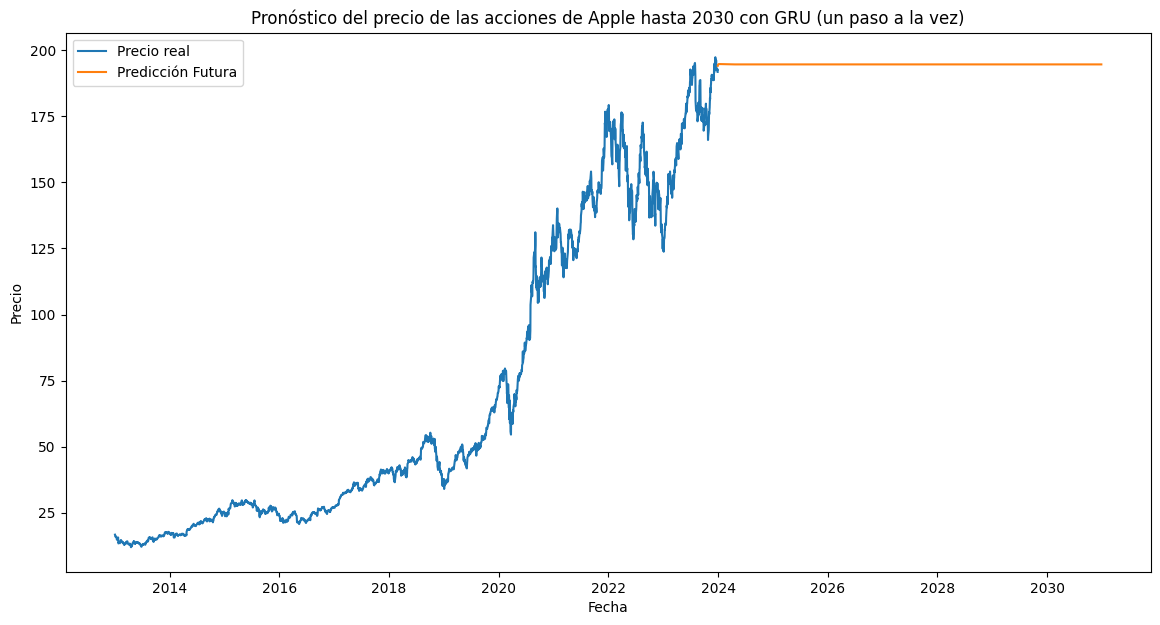

In [53]:
# Tomar la última ventana de datos para hacer predicciones futuras
last_window = scaled_data[-window_size:]

# Hacer predicciones futuras un paso a la vez y retroalimentar el modelo
future_predictions = []
current_input = last_window.reshape(1, window_size, X_train.shape[2])  # Aseguramos que sea 3D

for _ in range(7 * 365):  # Predicción de 7 años (un paso a la vez)
    future_pred = model.predict(current_input)
    future_predictions.append(future_pred[0, 0])
    
    # Rellenar el future_pred con los últimos valores del current_input excepto 'Close'
    future_pred_full = current_input[:, -1, :].copy()  # Copiar el último registro de current_input
    future_pred_full[0, 3] = future_pred[0, 0]  # Extraemos el valor escalar de la predicción y lo asignamos
    
    # Reshape future_pred_full a 3D y actualizar el input para el siguiente paso
    current_input = np.append(current_input[:, 1:, :], future_pred_full.reshape(1, 1, X_train.shape[2]), axis=1)

# Invertir la normalización para obtener los valores originales
future_predictions = scaler.inverse_transform(np.concatenate([np.array(future_predictions).reshape(-1, 1), np.zeros((len(future_predictions), scaled_data.shape[1]-1))], axis=1))[:, 0]

# Crear fechas para las predicciones futuras
last_date = apple_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7*365, freq='D')

# Graficar el pronóstico futuro hasta 2030
plt.figure(figsize=(14,7))
plt.plot(apple_data.index, apple_data['Close'], label='Precio real')
plt.plot(future_dates, future_predictions, label='Predicción Futura')
plt.title('Pronóstico del precio de las acciones de Apple hasta 2030 con GRU (un paso a la vez)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


mas unidades

Epoch 1/100


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 0.0254 - val_loss: 0.0020
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 4.4580e-04 - val_loss: 8.5149e-04
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 1.3499e-04 - val_loss: 7.5052e-04
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 1.1797e-04 - val_loss: 8.8608e-04
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 1.0377e-04 - val_loss: 0.0015
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 1.6616e-04 - val_loss: 5.3403e-04
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 9.2000e-05 - val_loss: 8.9815e-04
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 8.2152e-05 - val_loss: 5.9676e-04
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 7.5644e-05 - val_loss: 4.5870e-04
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 5.7720e-05 - val_loss: 7.2898e-04
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 6.0265e-05 

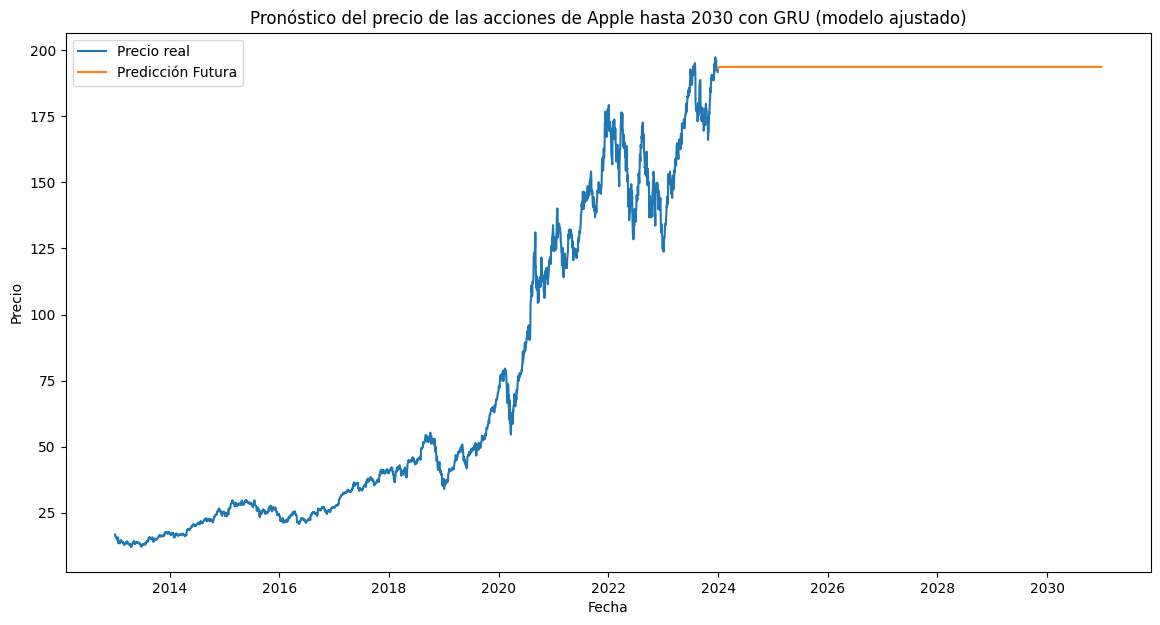

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU

# Construir un modelo GRU con más unidades y capas
model = Sequential()
model.add(GRU(units=150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # Primera capa GRU con más unidades
model.add(GRU(units=100, return_sequences=False))  # Segunda capa GRU
model.add(Dense(1))  # Capa de salida

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo con más épocas
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Predicciones futuras como antes, paso a paso
last_window = scaled_data[-window_size:]

future_predictions = []
current_input = last_window.reshape(1, window_size, X_train.shape[2])

for _ in range(7 * 365):
    future_pred = model.predict(current_input)
    future_predictions.append(future_pred[0, 0])
    
    # Actualizamos la entrada para el siguiente paso
    future_pred_full = current_input[:, -1, :].copy()
    future_pred_full[0, 3] = future_pred[0, 0]
    current_input = np.append(current_input[:, 1:, :], future_pred_full.reshape(1, 1, X_train.shape[2]), axis=1)

# Invertir la normalización
future_predictions = scaler.inverse_transform(np.concatenate([np.array(future_predictions).reshape(-1, 1), np.zeros((len(future_predictions), scaled_data.shape[1]-1))], axis=1))[:, 0]

# Crear fechas para las predicciones futuras
last_date = apple_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7*365, freq='D')

# Graficar el pronóstico futuro
plt.figure(figsize=(14,7))
plt.plot(apple_data.index, apple_data['Close'], label='Precio real')
plt.plot(future_dates, future_predictions, label='Predicción Futura')
plt.title('Pronóstico del precio de las acciones de Apple hasta 2030 con GRU (modelo ajustado)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


 Normalizar los datos:

In [21]:
# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_data)

# Verificar el resultado
print(scaled_data[:5])


[[0.02563812]
 [0.02450079]
 [0.02202269]
 [0.02151397]
 [0.02174535]]


4. Crear secuencias de tiempo:

In [22]:
# Definir el tamaño de la ventana de tiempo
window_size = 60

# Crear las secuencias y los valores a predecir
X = []
y = []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

# Convertir a arrays numpy y reshape
X, y = np.array(X), np.array(y)

# Reshape para que sea [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


. Dividir los datos en entrenamiento y prueba:

In [23]:
# Dividir en entrenamiento (80%) y prueba (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


6. Construir y compilar el modelo GRU:

In [31]:
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.models import Sequential

# Crear el modelo GRU utilizando Input() para definir la forma de entrada
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Definir la forma de entrada correctamente
model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=50))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0216 - val_loss: 8.3414e-04
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.0807e-04 - val_loss: 5.2430e-04
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 9.0761e-05 - val_loss: 6.9428e-04
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.9778e-05 - val_loss: 6.4284e-04
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 8.4276e-05 - val_loss: 4.7336e-04
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.5860e-05 - val_loss: 4.1081e-04
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 7.9734e-05 - val_loss: 4.6329e-04
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.7365e-05 - val_loss: 3.8108e-04
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.7920e-05 - val_loss: 4.8597e-04
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.4632e-05 - val_loss: 3.6458e-04
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.5125e-05 - 

7. Entrenar el modelo:

8. Hacer predicciones:

In [32]:
# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


9. Visualizar los resultados:

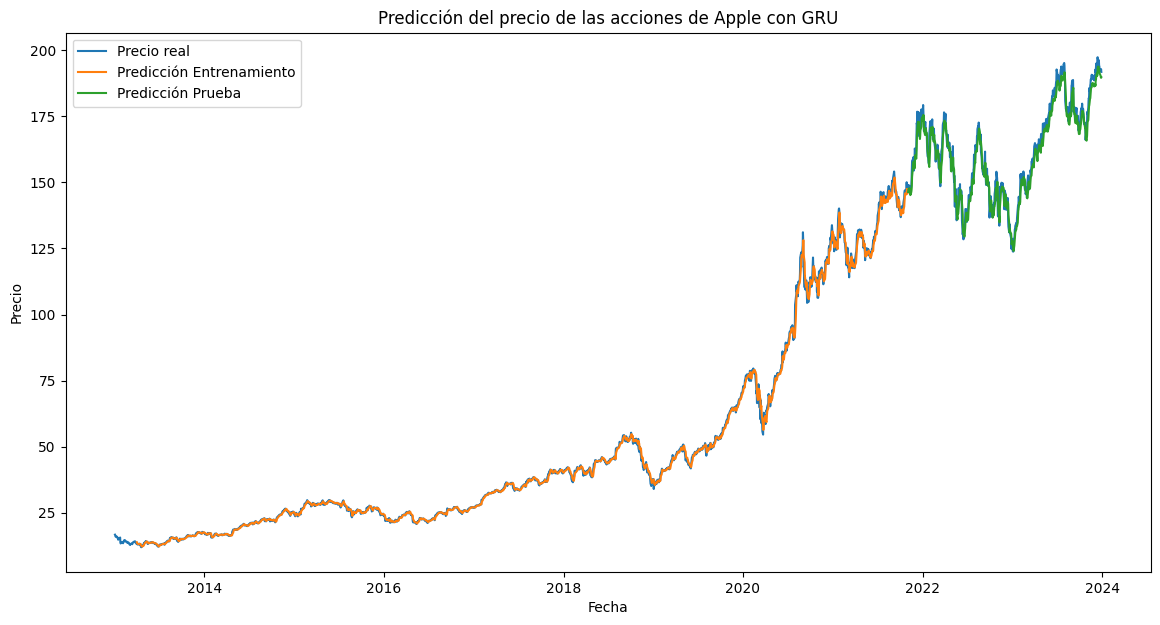

In [33]:
# Crear el eje de tiempo para los datos de entrenamiento y prueba
train_dates = apple_data.index[window_size:train_size+window_size]
test_dates = apple_data.index[train_size+window_size:]

# Graficar los resultados
plt.figure(figsize=(14,7))
plt.plot(apple_data.index, apple_data['Close'], label='Precio real')
plt.plot(train_dates, train_predict[:,0], label='Predicción Entrenamiento')
plt.plot(test_dates, test_predict[:,0], label='Predicción Prueba')
plt.title('Predicción del precio de las acciones de Apple con GRU')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


10. Predecir precios futuros hasta 2030:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

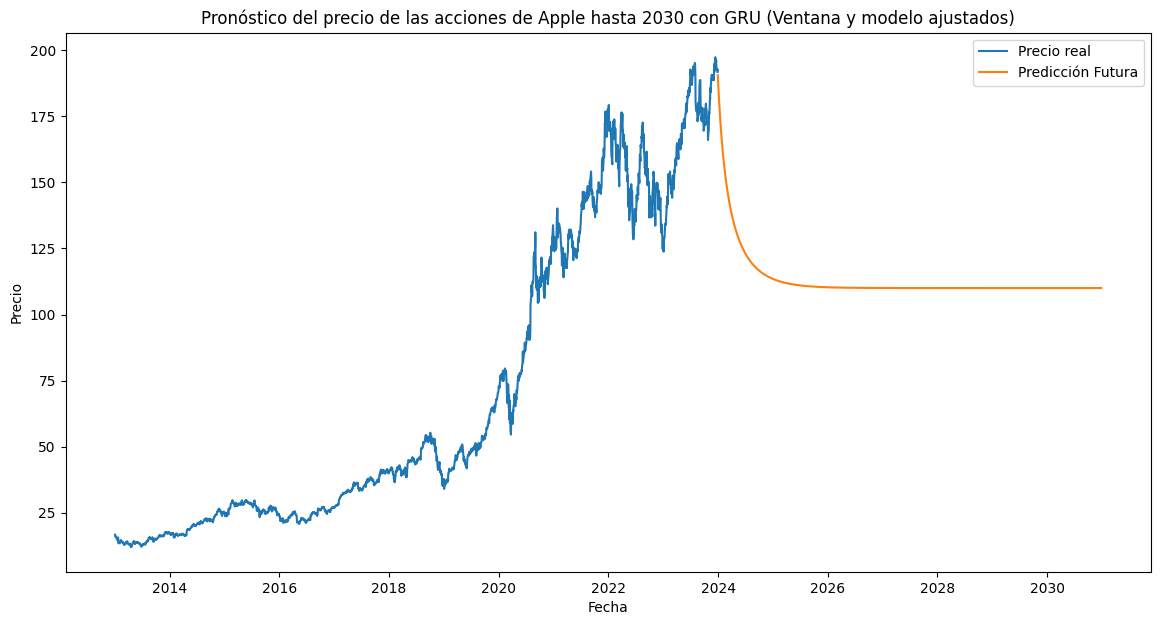

In [39]:
# Predicciones futuras (igual que antes pero con la nueva ventana de tiempo y modelo ajustado)
last_window = scaled_data[-window_size:]

# Hacer predicciones futuras
future_predictions = []
current_input = last_window.reshape(1, window_size, 1)  # Asegurar que sea 3D

for _ in range(7 * 365):  # Predicción de 7 años
    future_pred = model.predict(current_input)
    future_predictions.append(future_pred[0, 0])
    
    # Convertir future_pred a 3D antes de concatenar
    future_pred_reshaped = np.array(future_pred[0, 0]).reshape(1, 1, 1)
    
    # Actualizar la entrada, asegurando que ambas entradas tengan 3 dimensiones
    current_input = np.append(current_input[:, 1:, :], future_pred_reshaped, axis=1)

# Invertir la normalización
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Crear fechas para las predicciones futuras
last_date = apple_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7*365, freq='D')

# Graficar el pronóstico futuro
plt.figure(figsize=(14,7))
plt.plot(apple_data.index, apple_data['Close'], label='Precio real')
plt.plot(future_dates, future_predictions, label='Predicción Futura')
plt.title('Pronóstico del precio de las acciones de Apple hasta 2030 con GRU (Ventana y modelo ajustados)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()
